Summary: Day2——Loading in your own data

Author: Amusi

Date:  2018-09-01

Reference: 

- 视频：https://youtu.be/j-3vuBynnOE

- 在线文档：https://pythonprogramming.net/loading-custom-data-deep-learning-python-tensorflow-keras/

- Datasets：https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765

Note: 建议使用TensorFlow 1.9.0及以上版本，因为从tf1.9开始，keras就已经整合到tf中了

# 准备数据集

下载并解压 [Dogs vs Cats dataset from Microsoft](https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765) 数据集，将文件夹命名PetImages

In [2]:
import tensorflow as tf
print(tf.__version__)

1.10.0


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

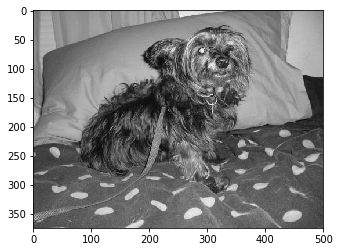

In [25]:
% matplotlib inline
DATADIR = "F:/Datasets/kagglecatsanddogs_3367a/PetImages"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # dog or cat path
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE )
        plt.imshow(img_array, cmap = plt.get_cmap('gray'))
        plt.show()
        break
    break

In [29]:
# 输出图像的宽度和长度
print(img_array.shape)

(375, 500)


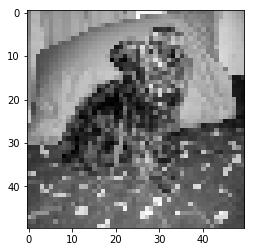

In [35]:
# resize images
IMG_SIZE = 50 # 30


new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = plt.get_cmap('gray'))
plt.show()

创新训练集

In [38]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # dog or cat path
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE )
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [39]:
print(len(training_data))

24946


shuffle() 将训练集中的元素随机排序，即打乱顺序

In [40]:
import random

random.shuffle(training_data)

In [41]:
for sample in training_data[:10]:
    print(sample[1])

0
0
1
0
0
1
0
0
1
0


In [42]:
x = []
y = []

In [44]:
for features, label in training_data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

将读入的训练数据保存成pickle格式

In [46]:
import pickle

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_out = open("x.pickle", "wb")
pickle.dump(x, pickle_out)
pickle_out.close()

加载刚才保存好的pickle文件

In [47]:
pickle_in = open("x.pickle", "rb")
x = pickle.load(pickle_in)

In [48]:
x[1]

array([[[162],
        [168],
        [149],
        ...,
        [162],
        [159],
        [164]],

       [[159],
        [156],
        [150],
        ...,
        [161],
        [164],
        [155]],

       [[151],
        [149],
        [149],
        ...,
        [161],
        [164],
        [157]],

       ...,

       [[164],
        [164],
        [159],
        ...,
        [ 44],
        [ 48],
        [ 40]],

       [[153],
        [155],
        [170],
        ...,
        [ 46],
        [ 46],
        [ 43]],

       [[166],
        [163],
        [164],
        ...,
        [ 50],
        [ 55],
        [ 47]]], dtype=uint8)